In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc file CSV
df = pd.read_csv("salaries.csv")

In [2]:
print("Số dòng và cột trong dataset:", df.shape)

Số dòng và cột trong dataset: (16534, 11)


In [3]:
print(df.head())

   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  202730             USD         202730                 US             0   
1   92118             USD          92118                 US             0   
2  130500             USD         130500                 US             0   
3   96000             USD          96000                 US             0   
4  190000             USD         190000                 US             0   

  company_location company_size  
0               US            M  
1           

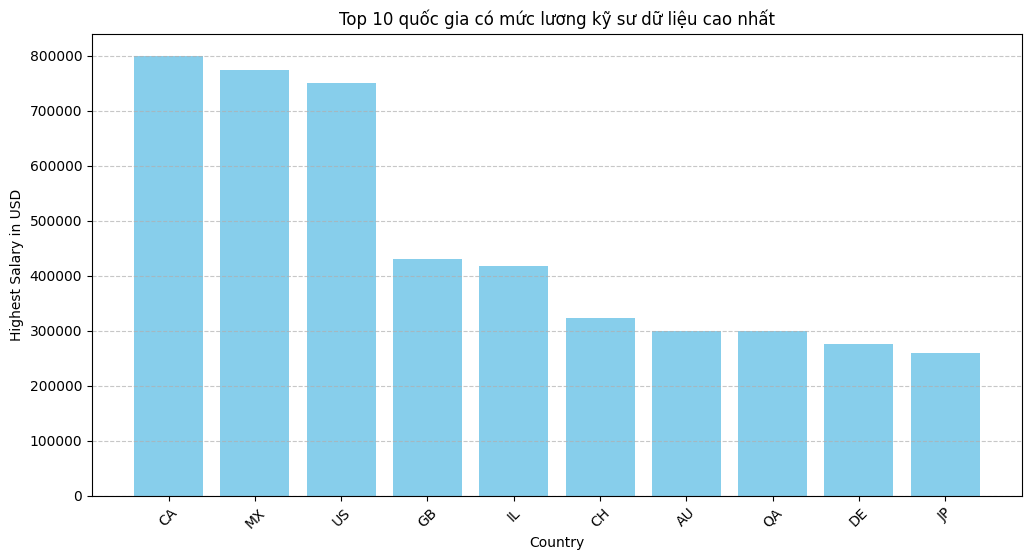

In [5]:
df = df.dropna(subset=['salary_in_usd'])

# Tính lương cao nhất theo quốc gia
top_countries = df.groupby('company_location')['salary_in_usd'].max().reset_index()

# Lấy top 10 quốc gia có lương cao nhất
top_countries = top_countries.sort_values(by='salary_in_usd', ascending=False).head(10)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.bar(top_countries['company_location'], top_countries['salary_in_usd'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Highest Salary in USD')
plt.title('Top 10 quốc gia có mức lương kỹ sư dữ liệu cao nhất')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file CSV
data = pd.read_csv("salaries.csv")

In [8]:
print("Loại hợp đồng có trong dataset:", data['employment_type'].unique())

# Loại bỏ giá trị NaN trong salary_in_usd
data = data.dropna(subset=['salary_in_usd']).copy()

# Tính mức lương trung bình theo loại hợp đồng
average_salaries_by_employment_type = data.groupby('employment_type')['salary_in_usd'].mean().reset_index()

Loại hợp đồng có trong dataset: ['FT' 'CT' 'PT' 'FL']


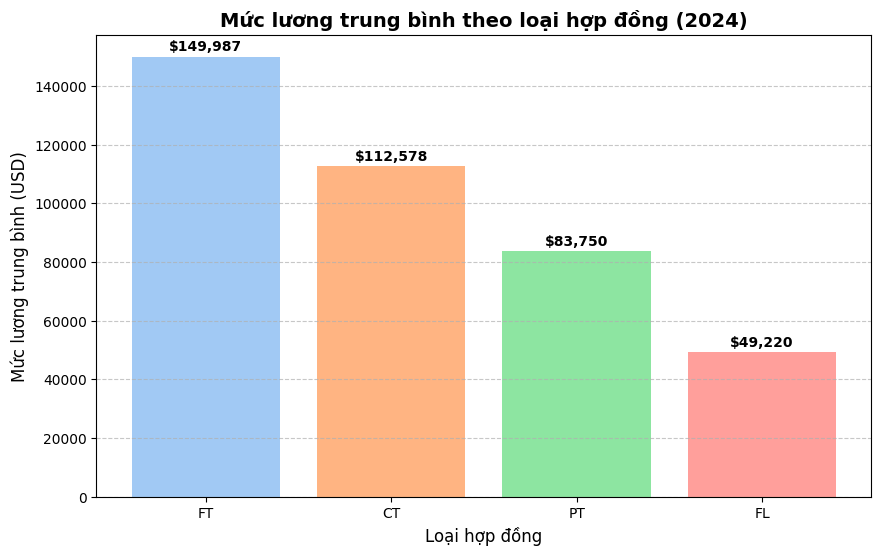

In [9]:
average_salaries_by_employment_type = average_salaries_by_employment_type.sort_values(by='salary_in_usd', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel")[:len(average_salaries_by_employment_type)]  # Chọn màu tự động
plt.bar(average_salaries_by_employment_type['employment_type'], 
        average_salaries_by_employment_type['salary_in_usd'], 
        color=colors)

# Thêm số liệu lên cột
for i, v in enumerate(average_salaries_by_employment_type['salary_in_usd']):
    plt.text(i, v + 2000, f"${int(v):,}", ha='center', fontsize=10, fontweight='bold')

# Cải thiện hiển thị
plt.xlabel('Loại hợp đồng', fontsize=12)
plt.ylabel('Mức lương trung bình (USD)', fontsize=12)
plt.title('Mức lương trung bình theo loại hợp đồng (2024)', fontsize=14, fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()

In [ ]:
# Tính mức lương trung bình theo quốc gia và loại hợp đồng
average_salaries_by_location_and_employment = data.groupby(['company_location', 'employment_type'])['salary_in_usd'].mean().reset_index()

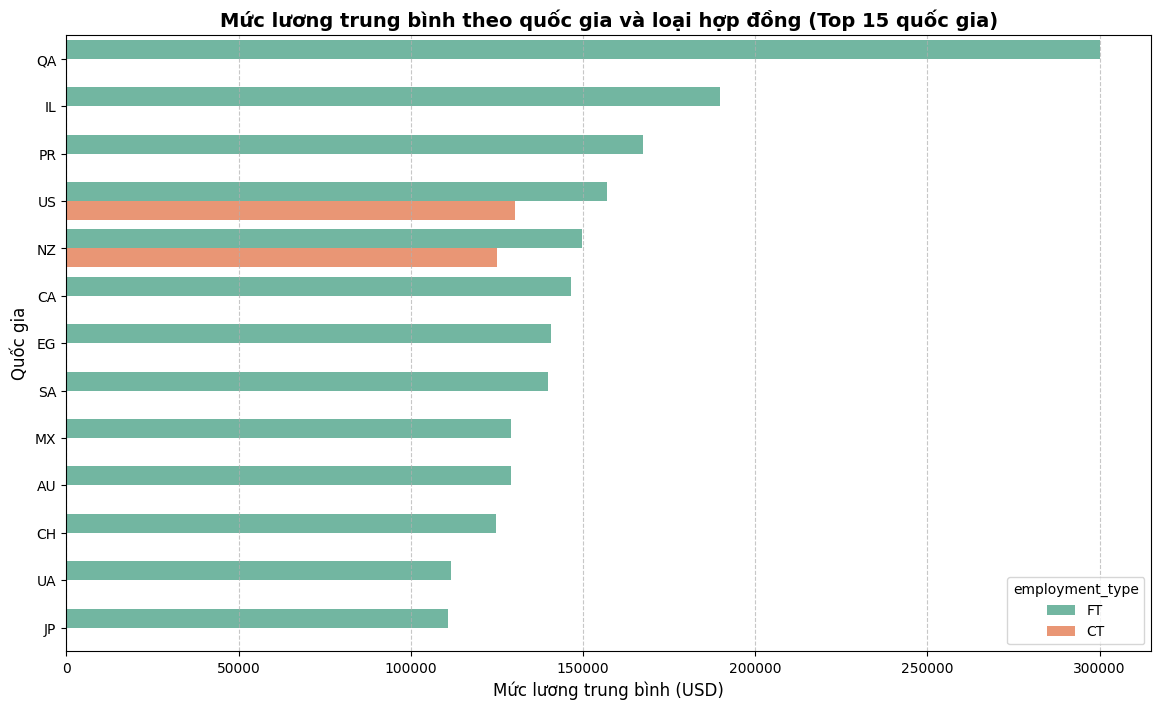

In [ ]:
## Sắp xếp theo mức lương giảm dần và lấy top 15 quốc gia
average_salaries_by_location_and_employment = average_salaries_by_location_and_employment.sort_values(by='salary_in_usd', ascending=False).head(15)

# Vẽ biểu đồ
plt.figure(figsize=(14, 8))
sns.barplot(x='salary_in_usd', y='company_location', hue='employment_type', data=average_salaries_by_location_and_employment, palette='Set2')
plt.xlabel('Mức lương trung bình (USD)', fontsize=12)
plt.ylabel('Quốc gia', fontsize=12)
plt.title('Mức lương trung bình theo quốc gia và loại hợp đồng (Top 15 quốc gia)', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Kiểm tra xem cột 'experience_level' có tồn tại trong dữ liệu không
print(data['experience_level'].unique())

# Tính mức lương trung bình theo số năm kinh nghiệm
average_salaries_by_experience = data.groupby('experience_level')['salary_in_usd'].mean().reset_index()


['SE' 'MI' 'EN' 'EX']


C:\Users\DELL\AppData\Local\Temp\ipykernel_12464\4289263795.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='experience_level', y='salary_in_usd', data=average_salaries_by_experience, palette='Blues')


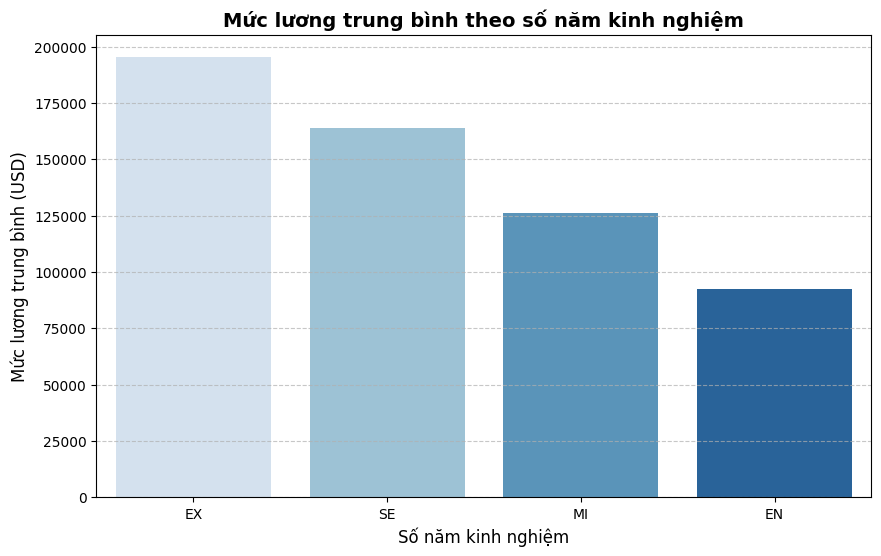

In [15]:
#SE: Senior (Cấp cao) Đây là những người có nhiều kinh nghiệm trong ngành, thường có trên 5 năm kinh nghiệm làm việc.
#MI: Mid-Level (Cấp giữa) Những người có kinh nghiệm từ khoảng 2 đến 5 năm trong lĩnh vực.
#EN: Entry-Level (Mới vào nghề) Đây là những người mới bắt đầu sự nghiệp, thường có ít hơn 2 năm kinh nghiệm trong ngành.
#EX: Executive (Cấp điều hành) Đây có thể là những người có vai trò quản lý hoặc lãnh đạo, có nhiều năm kinh nghiệm và làm việc ở vị trí cao cấp.

# Sắp xếp theo mức lương giảm dần
average_salaries_by_experience = average_salaries_by_experience.sort_values(by='salary_in_usd', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=average_salaries_by_experience, palette='Blues')
plt.xlabel('Số năm kinh nghiệm', fontsize=12)
plt.ylabel('Mức lương trung bình (USD)', fontsize=12)
plt.title('Mức lương trung bình theo số năm kinh nghiệm', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
# Kiểm tra các vị trí công việc có trong dữ liệu
print(data['job_title'].unique())

# Tính mức lương trung bình theo vị trí công việc
average_salaries_by_job_title = data.groupby('job_title')['salary_in_usd'].mean().reset_index()


['AI Engineer' 'Data Engineer' 'Machine Learning Engineer' 'ML Engineer'
 'Data Analyst' 'NLP Engineer' 'Data Scientist' 'Applied Scientist'
 'Data Manager' 'Data Architect' 'Data Operations Manager'
 'Research Scientist' 'Data Science Manager'
 'Business Intelligence Engineer' 'Business Intelligence' 'Data Modeler'
 'Data Integration Specialist' 'Data Product Manager'
 'Data Visualization Specialist' 'Data Science' 'Data Specialist'
 'Business Intelligence Lead' 'Research Analyst'
 'Business Intelligence Analyst' 'AI Software Engineer'
 'Machine Learning Scientist' 'Data Science Engineer'
 'Machine Learning Operations Engineer' 'Analytics Engineer'
 'Data Management Analyst' 'Encounter Data Management Professional'
 'Data Analytics Specialist' 'Head of Data' 'Data Analytics Lead'
 'Research Engineer' 'AI Scientist' 'Business Intelligence Developer'
 'Machine Learning Developer' 'Data Management Specialist'
 'Data Infrastructure Engineer' 'BI Developer' 'Admin & Data Analyst'
 'Insight

C:\Users\DELL\AppData\Local\Temp\ipykernel_12464\1737480822.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary_in_usd', y='job_title', data=average_salaries_by_job_title, palette='coolwarm')


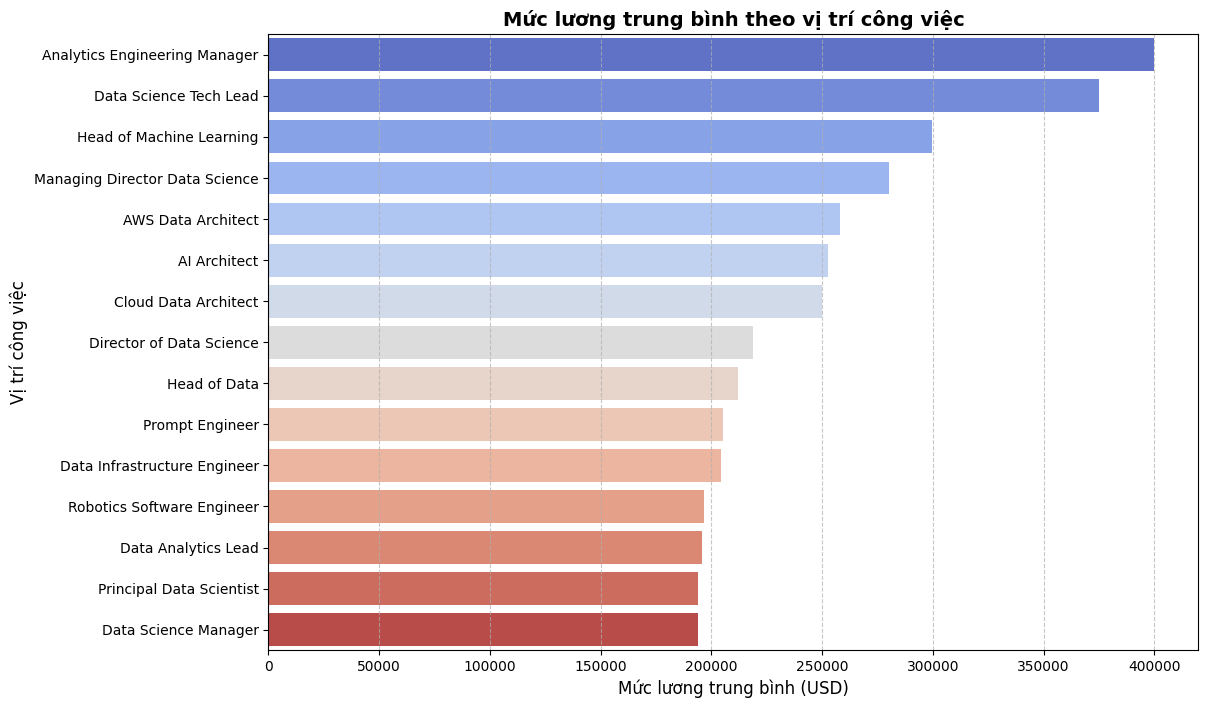

In [20]:
# Sắp xếp theo mức lương giảm dần
average_salaries_by_job_title = average_salaries_by_job_title.sort_values(by='salary_in_usd', ascending=False).head(15)

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
sns.barplot(x='salary_in_usd', y='job_title', data=average_salaries_by_job_title, palette='coolwarm')
plt.xlabel('Mức lương trung bình (USD)', fontsize=12)
plt.ylabel('Vị trí công việc', fontsize=12)
plt.title('Mức lương trung bình theo vị trí công việc', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Các loại hợp đồng có trong dataset: ['FT' 'CT' 'PT' 'FL']


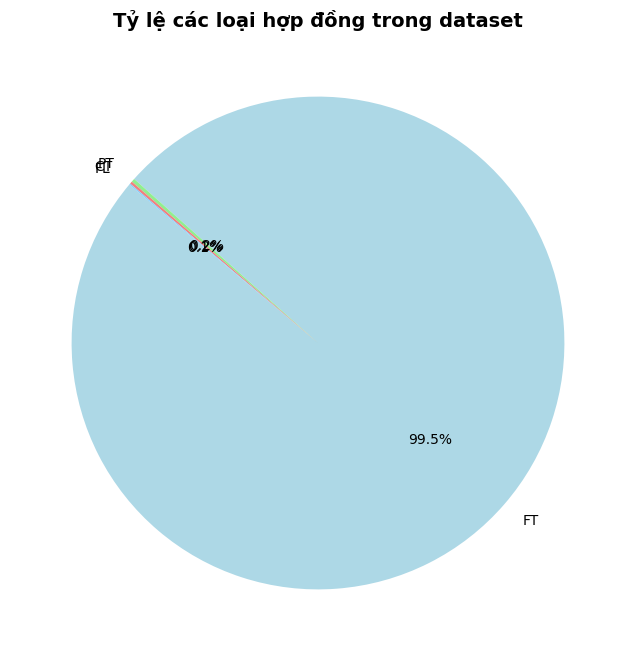

In [ ]:
print("Các loại hợp đồng có trong dataset:", data['employment_type'].unique())

# Tính số lượng các loại hợp đồng
employment_type_counts = data['employment_type'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(employment_type_counts, labels=employment_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])

# Thêm tiêu đề
plt.title('Tỷ lệ các loại hợp đồng', fontsize=14, fontweight='bold')

# Hiển thị biểu đồ
plt.show()